# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
print('Brain name is:', brain_name)

Brain name is: ReacherBrain


### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
# env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
# states = env_info.vector_observations                  # get the current state (for each agent)
# scores = np.zeros(num_agents)                          # initialize the score (for each agent)
# while True:
#     actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#     actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#     env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#     next_states = env_info.vector_observations         # get next state (for each agent)
#     rewards = env_info.rewards                         # get reward (for each agent)
#     dones = env_info.local_done                        # see if episode finished
#     scores += env_info.rewards                         # update the score (for each agent)
#     states = next_states                               # roll over states to next time step
#     if np.any(dones):                                  # exit loop if episode finished
#         break
# print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

When finished, you can close the environment.

In [6]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In this section the design of the agent and the training process will be described. For the hyper-parameters not mentioned in this section, they will be described in the comment of the code block with actual config dict.

#### Agent and model structure
We train a DDPG (deep deterministic policy gradients) agent (described in paper [Continuous control with deep reinforcement learning](https://arxiv.org/abs/1509.02971)) to perform the Reacher task. The formal description from this paper is as following:

![DDPG algorithm](./ddpg_algorithm.png)



The actor and critic are two disjoint feed-forward neural networks, each with 3 hidden layers.Each hidden layer has ReLU as activation, and there is no additional activation function to the output. In our final configuration the actor has (256, 128, 64) units of three hidden units respectively, with about 67k parameters (according to `torchsummary`). The critic has (512, 256, 128) hidden units respectively, yielding about 218k parameters.

The weights of the neural nets are initialized as orthogonal vectors (with `nn.init.orthogonal_` method) and the parameters are trained with Adam optimizers.

#### Training strategy

We apply action repeat strategy to train the agent. The input vector to both actor and critic is the concatenation of three consecutive observation vectors (99 dimensions in total), and each action is also repeated 3 times to interact with the environment. This is an important strategy to make the neural net achieve better performance after convergence.

We also apply gradient clip to make training process more stable. Without gradient clip, with relatively high learning rates, the agent starts to perform very badly after a certain point. In this case the 100-episode average reward drops from range 6~10 down to range 0~1. But if a low learning rate is configured the agent learns too slow (does not converge after 5000 episodes).

The Ornstein–Uhlenbeck noise is added to the actor with a fixed discount rate of 0.9995 per step. After about 15000 steps the noise level is reduced to <0.001 and will be neglectable afterwards.

In [7]:
%load_ext autoreload

In [8]:
%autoreload 2
from src import *

env_info = env.reset(train_mode=True)[brain_name]
wrapped_env = EnvWrapper(unity_env=env, brain_name=brain_name)

config = {
    # Configs about the task.
    # The dimension of the observation (before action repeat).
    'state_size': 33,
    # The dimension of action.
    'action_size': 4,
    # The bound of actions.
    'out_low': -1.,
    'out_high': 1.,
    
    # Configs for the agent.
    # The soft update rate for DDPG agent.
    'tau': 1e-2,
    # The coefficient in reward function.
    'gamma': 0.98,
    # The scaling factor of the initial weights.
    'init_weight_scale': 0.3,
    # The max norm of gradient for each optimization step.
    'grad_clip': 20.,
    # The structure of actor's hidden layers.
    'actor_hidden': [256, 128, 64],
    # The initial learning rate of the actor.
    'actor_lr': 3e-4,
    # The structure of critic's hidden layers.
    'critic_hidden': [512, 256, 128],
    # The initial learning rate of the critic.
    'critic_lr': 1e-4,
    # Repeat each action 3 times and concatenate 3 consecutive observations
    # as actual input fed into the actor/critic networks.
    'action_repeat': 3,
    
    # Configs for the training process.
    # The discount rate of OU noise.
    'noise_discount': 0.9995,
    # The seed for random initializations, including the model weights
    # and the noise.
    'seed': 1317317,
    # The size of replay buffer.
    'buffer_size': 1000 * 1000,
    # The batch size for each update.
    'batch_num': 32,
    # The maximum number of episodes to train.
    'max_episode_num': 2000,
    # The maximum number of steps to train.
    'max_step_num': 1e8,
    # Only update the model every learn_interval. It turned out that
    # this hyper-parameter is not helpful to make training more stable
    # so just set it as 1 to learn at every new step.
    'learn_interval': 1,
    
    # Configs for logging.
    # The window size to calculate average rewards.
    'window_size': 100,
    # The output directory of models.
    'model_dir': './reacher_model',
    # The file to log the reward trajectory.
    'log_file': './reacher_log.pickle',
    # The interval to print out the rewards.
    'log_interval': 50,
}

print(brain_name)
agent = DDPGAgent(config)
TrainDDPG(wrapped_env, agent, config)

Using unity env with brain name "ReacherBrain"
ReacherBrain
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 512]          53,248
            Linear-2                  [-1, 256]         131,328
            Linear-3                  [-1, 128]          32,896
      BasicNetwork-4                  [-1, 128]               0
            Linear-5                    [-1, 1]             129
      BasicNetwork-6                    [-1, 1]               0
Total params: 217,601
Trainable params: 217,601
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.83
Estimated Total Size (MB): 0.84
----------------------------------------------------------------
----------------------------------------------------------------
        Layer (type)               Output Sha

In the logged lines above, each line has 5 numbers: the episode number, the reward of this episode, the 100-episode average reward (in the parenthesis), the running time of this episode and the 100-episode average running time (in the parenthesis).

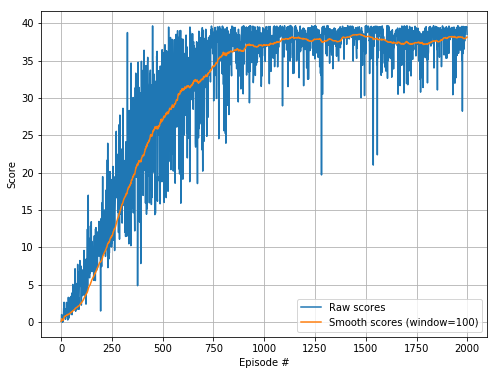

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
def plot_scores(raw_scores, smooth_scores, figsize=(8,6)):
    """
        Plots the raw_scores and smoothed scores in one single figure.
    """
    assert(len(raw_scores) == len(smooth_scores))
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(raw_scores)), raw_scores, label='Raw scores')
    plt.plot(np.arange(len(smooth_scores)), smooth_scores, label='Smooth scores (window=100)')
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.legend()
    plt.grid()
    plt.show()
    

import pickle
logs = pickle.load(open('./reacher_log.pickle', 'rb'))
raw, smoothed = logs.get_all_rewards()
plot_scores(raw, smoothed)

The figure above shows the rewards of the agent receives an average reward (over 100 episodes) (version 1). According to this figure, the performance of the agent converges after about 1000 episodes of training and remains around 38 afterwards. The agent is considered reliably solved this task because it consistantly achieves 30+ rewards after convergence (with a small number of exceptions).

To further improve the performance, the simplest way is to make the networks wider (adding more hidden units per layer). It will help the model better approximate the reward function and get better value estimations. I don't know whether making networks deeper will work. In my experience when there are more than 3 hidden layers the training process is slower and less stable (maybe I just didn't find the proper hyper parameters).

Another potential improvement is to add N-step estimation and priority experience replay to make the agent learn faster in the early stages.